In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

output_data = '2018_Top30zipcodes_edited.csv'
file_input = '2018_Listings.csv'
listings = pd.read_csv(file_input)
listings['zipcode'] = pd.to_numeric(listings['zipcode'])
by_zipcode = listings.groupby('zipcode').count()
by_zipcode = by_zipcode.sort_values('id', ascending=False)
by_zipcode.head(30)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Date
zipcode,,,,,,,,,,,,,,,,,
11211,28747,28711,28747,28704,28747,28747,28747,28747,28747,28747,28747,28747,22994,22973,28747,28747,28747
11221,21723,21711,21723,21712,21723,21723,21723,21723,21723,21723,21723,21723,17723,17711,21723,21723,21723
11206,18448,18437,18448,18418,18448,18448,18448,18448,18448,18448,18448,18448,14455,14444,18448,18448,18448
11216,16506,16506,16506,16485,16506,16506,16506,16506,16506,16506,16506,16506,13207,13201,16506,16506,16506
10002,16058,16046,16058,16040,16058,16058,16058,16058,16058,16058,16058,16058,13146,13136,16058,16058,16058
10019,15162,15124,15162,15151,15162,15162,15162,15162,15162,15162,15162,15162,11157,11149,15162,15162,15162
10009,14926,14926,14926,14915,14926,14926,14926,14926,14926,14926,14926,14926,12284,12276,14926,14926,14926
11238,14689,14689,14689,14662,14689,14689,14689,14689,14689,14689,14689,14689,11997,11986,14689,14689,14689
10003,14217,14193,14217,14208,14217,14217,14217,14217,14217,14217,14217,14217,11086,11078,14217,14217,14217


In [2]:
zipcodes = [11211,11221,11206,11216,10002,10019,10009,11238,10003,11222,10025,11237,10036,11215,10027,10016,10031,10011,11249,
            11233,10012,10014,10029,11205,11226,11225,11217,11213,10023,10024]
means = []
medians = []

for zipcode in zipcodes:
    median = listings.loc[listings['zipcode']==zipcode]['price'].median()
    mean = listings.loc[listings['zipcode']==zipcode]['price'].mean()
    means.append(mean)
    medians.append(median)

zipcode_prices = pd.DataFrame({
    'Zip Code':zipcodes,
    'Mean': means,
    'Median': medians
})
zipcode_prices.to_csv(output_data)
zipcode_prices

,Zip Code,Mean,Median
0,11211,146.840053,110.0
1,11221,87.629931,68.0
2,11206,96.825835,75.0
3,11216,110.636435,85.0
4,10002,171.128160,130.0
5,10019,228.574660,180.0
6,10009,170.691880,140.0
7,11238,137.844509,105.0
8,10003,223.038827,169.0
9,11222,135.671584,109.5


Text(0.5,1,'Mean and Median Prices by Zipcode')

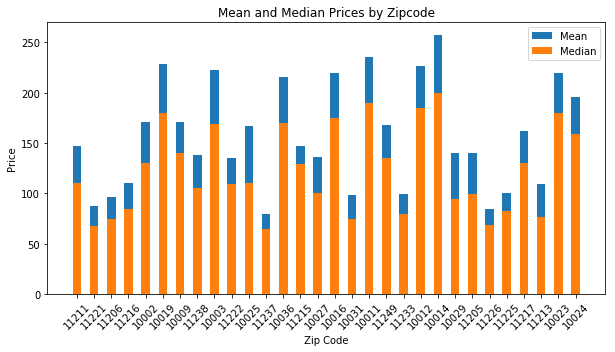

In [6]:
# Plot Mean and Median
plt.figure(figsize = (10,5))
x_axis = np.arange(len(zipcode_prices['Zip Code']))
tick_locations = [x for x in x_axis]
plt.xticks(tick_locations, zipcode_prices['Zip Code'],rotation=45)
plt.bar(x_axis, zipcode_prices['Mean'], label ='Mean',width = 0.5)
plt.bar(x_axis, zipcode_prices['Median'], label = 'Median',width = 0.5)
plt.legend(loc='best')
plt.xlabel('Zip Code')
plt.ylabel('Price')
plt.title('Mean and Median Prices by Zipcode')

In [4]:
# Create Data Frame with specified zipcodes
zipcodes = [11211,11221,11206,10019,11216,10002,10009,10003,11222,11238]
frames = []

for zipcode in zipcodes:
    one_zip = listings.loc[listings['zipcode']==zipcode]
    frames.append(one_zip)

by_zip = pd.concat(frames)
by_zip

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,zipcode,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Date
20,6848,Only 2 stops to Manhattan studio,15991,Allen & Irina,Brooklyn,Williamsburg,11211,40.708372,-73.953519,Entire home/apt,140,2,84,12/6/2017,0.80,1,310,201801
26,7801,Sweet and Spacious Brooklyn Loft,21207,Chaya,Brooklyn,Williamsburg,11211,40.718418,-73.957183,Entire home/apt,299,3,10,12/28/2011,0.10,1,315,201801
68,14377,Williamsburg 1 bedroom Apartment,56512,Joanna,Brooklyn,Williamsburg,11211,40.708808,-73.959302,Entire home/apt,140,2,87,1/2/2018,0.89,1,64,201801
108,18764,Cozy 2 BR in Williamsburg,72014,Lulú,Brooklyn,Williamsburg,11211,40.711540,-73.961120,Private room,129,3,55,4/12/2016,0.58,4,264,201801
113,19812,2 bedroom Williamsburg Apt - Bedford L stop,74857,Starlee,Brooklyn,Williamsburg,11211,40.718327,-73.957478,Entire home/apt,95,3,53,10/22/2017,0.55,1,313,201801
117,20611,Cozy Bedroom in Williamsburg 2 BR,72014,Lulú,Brooklyn,Williamsburg,11211,40.711558,-73.962178,Private room,84,3,149,12/20/2017,1.57,4,224,201801
120,20793,5-Star Charming Carriage House Suite-Williamsburg,42756,Leslie,Brooklyn,Williamsburg,11211,40.710545,-73.962100,Entire home/apt,178,2,316,1/5/2018,3.32,3,287,201801
122,21218,5-Star Roof-Top Room--Williamsburg,42756,Leslie,Brooklyn,Williamsburg,11211,40.710529,-73.960866,Entire home/apt,148,2,409,1/8/2018,4.34,3,223,201801
123,21220,5-Star Gorgeous Williamsburg 1BR Apartment,42756,Leslie,Brooklyn,Williamsburg,11211,40.710121,-73.961302,Entire home/apt,248,1,323,1/1/2018,3.41,3,272,201801
141,25406,Modern Traveler's Suite in Brooklyn,105538,Erik,Brooklyn,Williamsburg,11211,40.714591,-73.948443,Entire home/apt,139,5,28,10/21/2017,0.51,1,44,201801


In [5]:
# Find average prices by month
by_mean = by_zip.groupby('Date')['price'].mean()
by_median = by_zip.groupby('Date')['price'].median()
by_mean

Date
201801    143.586240
201802    143.910273
201803    143.517864
201804    144.285518
201805    146.546349
201806    145.857973
201807    149.439141
201808    146.240741
201809    147.943763
201810    147.590539
201811    150.870700
201812    150.838147
Name: price, dtype: float64

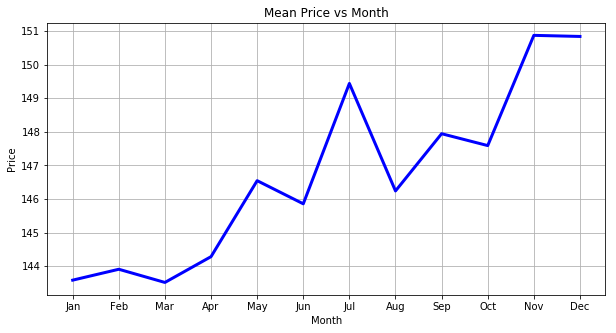

In [131]:
# Plot averages
plt.figure(figsize=(10,5))
x_axis = np.arange(len(by_month))
tick_locations = [x for x in x_axis]
plt.xticks(tick_locations, ['Jan','Feb','Mar','Apr','May','Jun',
                            'Jul','Aug','Sep','Oct','Nov','Dec'])
plt.plot(x_axis, by_mean, color='blue', linewidth=3)
plt.grid()
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Mean Price vs Month')
plt.show()

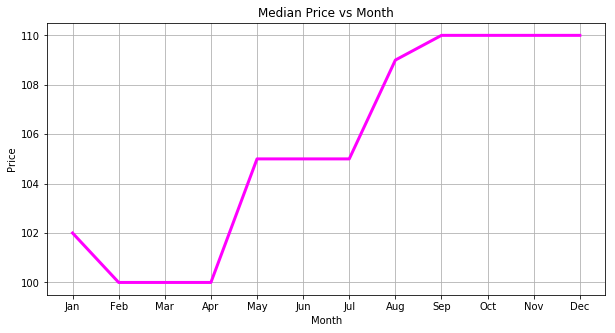

In [133]:
plt.figure(figsize=(10,5))
x_axis = np.arange(len(by_month))
tick_locations = [x for x in x_axis]
plt.xticks(tick_locations, ['Jan','Feb','Mar','Apr','May','Jun',
                            'Jul','Aug','Sep','Oct','Nov','Dec'])
plt.plot(x_axis, by_median, color='magenta', linewidth=3)
plt.grid()
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Median Price vs Month')
plt.show()